<a href="https://colab.research.google.com/github/Hitenjain20/Grammar-Error-correction/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import re
import unicodedata
import spacy
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!tar -xvf /content/drive/MyDrive/Data/lang8.bea19.tar.gz

lang8.train.auto.bea19.m2
lang8_to_m2.py
readme.txt


In [12]:
with open('lang8.train.auto.bea19.m2') as f: #lang8.train.auto.bea19.m2
  data = f.readlines()

In [13]:
print(len(data))

4015882


In [14]:
m2 = open('lang8.train.auto.bea19.m2').read().strip().split("\n\n")
out = open('corrected.txt', "w")
in_ = open('error.txt', "w")
# Do not apply edits with these error types
skip = {"noop", "UNK", "Um"}

for sent in tqdm(m2):
  #print(sent)
  sent = sent.split("\n")
  cor_sent = sent[0].split()[1:] # Ignore "S "

  in_.write(" ".join(sent[0].split()[1:])+"\n" )
  #print('ORIGINAL',sent[0].split()[1:])
  
  edits = sent[1:]
  offset = 0
  for edit in edits:
    edit = edit.split("|||")
    if edit[1] in skip: continue # Ignore certain edits
    coder = int(edit[-1])
    if coder != 0: continue # Ignore other coders
    span = edit[0].split()[1:] # Ignore "A "
    start = int(span[0])
    end = int(span[1])
    cor = edit[2].split()
    cor_sent[start+offset:end+offset] = cor
    offset = offset-(end-start)+len(cor)

  #print('CORRECT',cor_sent)
  out.write(" ".join(cor_sent)+"\n")

100%|██████████| 1037561/1037561 [00:09<00:00, 110616.60it/s]


In [15]:
with open('corrected.txt') as f:
  correct_data = f.read()

with open('error.txt') as f:
  error_data = f.read()

In [16]:
final_data = pd.DataFrame(columns = ['error', 'correct'])

final_data['correct'] = correct_data.split('\n')
final_data['error'] = error_data.split('\n')[:len(final_data['correct'])]

In [17]:
final_data.describe()

,error,correct
count,1037481,1037481
unique,943888,937889
top,URL,URL
freq,2765,2762


In [18]:
pd.options.display.max_colwidth = 600
final_data[:50]

,error,correct
0,Good luck on your new start !,Good luck on your new start !
1,My teacher is going to move to change his job .,My teacher is going to move to change his job .
2,He is a so nice guy and taught me English very kindly and was willing to accept my getting off the track .,He is a so nice guy and taught me English very kindly and was willing to accept my getting off the track .
3,And he took in my favorite subject like soccer .,And he took in my favorite subjects like soccer .
4,"Actually , who let me know about Lang - 8 was him .","Actually , he was the one who let me know about Lang - 8 . ."
5,He is also good at Japanese and studies ' Kanji ' .,He is also good at Japanese and studies ' Kanji ' .
6,His Kanji 's ability is much better than me .,His Kanji ability is much better than mine .
7,"We 've known each other for only half a year , but his lesson was a lot of fun .","We 've known each other for only half a year , but his lessons were a lot of fun ."
8,I 'm going to miss him but I really wish him the best of luck with his new life .,I 'm going to miss him but I really wish him the best of luck with his new life .
9,I 'm looking forward to seeing him again through here .,I 'm looking forward to seeing him again through here .


In [19]:
final_data[50:100]

,error,correct
50,"Well , I just proud of myself , yep .","Well , I just proud of myself , yep ."
51,: ),: )
52,"And , by the way , `` white nights `` have already come .","And , by the way , `` white nights `` have already come ."
53,And now they disturb me .,And now they disturb me .
54,If only I had black dense curtains .,If only I had dense black curtains .
55,Whitney Houston Failed,Whitney Houston Failed
56,"A couple of weeks ago , I heard a new Whitney Houston 's tune on my car radio .","A couple of weeks ago , I heard a new Whitney Houston tune / song on my car radio ."
57,It sounded not bad .,It sounded not bad .
58,I had been wondering what she was doing .,I had been wondering what she was / has been doing .
59,"And finally , she released a new song !","And finally , she released a new song !"


In [21]:
final_data.to_csv("/content/drive/MyDrive/Data/raw_data.csv", index = False)

In [22]:
final_data = pd.read_csv("/content/drive/MyDrive/Data/raw_data.csv")

In [23]:
final_data.describe()

,error,correct
count,1037480,1037479
unique,943887,937887
top,URL,URL
freq,2765,2762


In [24]:
final_data = final_data.drop_duplicates()

In [25]:
final_data.describe()

,error,correct
count,950673,950672
unique,943887,937887
top,Nice to meet you .,What do you think ?
freq,11,31


In [26]:
final_data = final_data.dropna()

In [27]:
final_data.describe()

,error,correct
count,950672,950672
unique,943886,937887
top,Nice to meet you .,What do you think ?
freq,11,31


In [28]:
len_1 = [ len(final_data['correct'].iloc[i]) for i in range(len(final_data['correct'])) ]
len_2= [ len(final_data['error'].iloc[i]) for i in range(len(final_data['error'])) ]

Text(0.5, 0, 'Number of words in the grammatically correct sentences')

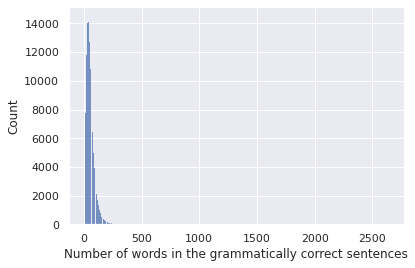

In [29]:
sns.set_theme()
ax = sns.histplot(data=len_1)
ax.set_xlabel('Number of words in the grammatically correct sentences')

Text(0.5, 0, 'Number of words in the grammatically incorrect sentences')

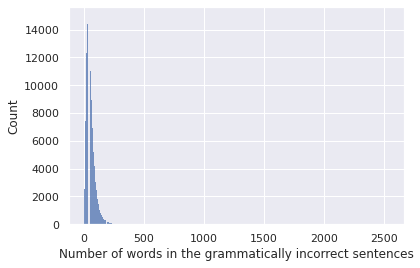

In [30]:
sns.set_theme()
ax = sns.histplot(data=len_2)
ax.set_xlabel('Number of words in the grammatically incorrect sentences')

In [31]:
for i in range(0, 100, 10):
  print(np.percentile(len_1,i))

1.0
20.0
28.0
35.0
41.0
48.0
56.0
66.0
79.0
101.0


In [32]:
for i in range(0, 100, 10):
  print(np.percentile(len_2,i))

1.0
19.0
27.0
34.0
40.0
47.0
55.0
64.0
77.0
100.0


In [33]:
for i, row in enumerate(final_data['error']):
  #print(i, row)
  if row.split(" ") == final_data['correct'].iloc[i].split(" ") or len(row.split(" ")) >= 15 or len(row.split(" ")) <= 5:
    final_data.iloc[i] = np.nan

In [34]:
final_data = final_data.dropna()

In [35]:
final_data.describe()

,error,correct
count,290242,290242
unique,289535,288179
top,I start Lang - 8 today .,This is my first diary entry .
freq,5,20


In [36]:
def decontracted(phrase):

    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"gon na", " going to", phrase)
    phrase = re.sub(r"wan na", " want to", phrase)
    phrase = re.sub(r"gonna", " going to", phrase)
    phrase = re.sub(r"wanna", " want to", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub("\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
        
    return phrase

def clean_text(t):

  #print(t)

  t = unicodedata.normalize('NFKD', t).encode('ascii', 'ignore').decode('ascii') #No need to normalize as text is already an <str> with utf-8 character set
  t = decontracted(t)

  t = re.sub(r'x D', '', t)
  t = re.sub(r': D', '', t)
  t = re.sub(r': P', '', t)

  t = re.sub(r'xD', '', t)
  t = re.sub(r':D', '', t)
  t = re.sub(r':P', '', t)

  #If brackets in text, remove text within brackets
  if '(' in t and ')' in t:
    try:
      t = re.sub(t.split("(")[-1].split(")")[0], '', t)
    except:
      pass
    #t = re.sub("(", '', t)
    #t = re.sub(")", '', t)
  
  #Replace all characters except these with space
  t = re.sub(r'[^A-Za-z;!?.,\-\' ]+', ' ', t)

  #If semicolon in text, remove the part after semicolon till fullstop (since we don't know if the text after semicolon is a continuation of the sentence or a new context altogether)
  #if ';' in t:
  #  t = re.sub(';', ' , ', t)

  t = re.sub(r'\.+',r' .',t)
  t = re.sub(r'\;+',r' , ',t)
  t = re.sub(r'!+',r' !',t )
  t = re.sub(r'\?+',r' ?',t )
  t = re.sub(r'\-+',r' - ',t )
  t = re.sub(r'\,+',r' , ',t )
  t = re.sub(r'\'+',r" ' ",t)
  t = re.sub(' +', ' ', t)

  return t

In [37]:
final_data['correct'] = final_data['correct'].apply(clean_text)
final_data['error'] = final_data['error'].apply(clean_text)

In [38]:
final_data[:50]

,error,correct
3,And he took in my favorite subject like soccer .,And he took in my favorite subjects like soccer .
4,"Actually , who let me know about Lang - was him .","Actually , he was the one who let me know about Lang - . ."
6,His Kanji is ability is much better than me .,His Kanji ability is much better than mine .
11,I heard a sentence last night when I watched TV .,I heard a sentence last night when I was watching TV .
15,"When you go uphill , you hvae to bend your back .","When you go uphill , you have to bend your back ."
17,"When you are go smoothly , you have to be more modest .","When everything is going smoothly , you have to be more modest ."
23,The making souvenir is a hard and interesting work .,Making souvenirs is a hard but interesting work .
36,"You know , you can take them at slot machine .","You know , you can ? them at a slot machine ."
38,The third memory is the house we lived .,The third memory is the house where we lived .
44,I liked the winter Finland .,I liked Finland in the Winter .


In [39]:
final_data.describe()

,error,correct
count,290242,290242
unique,288725,286981
top,,
freq,544,578


In [40]:
final_data = final_data.drop_duplicates()
final_data = final_data.dropna()

In [41]:
final_data.describe()

,error,correct
count,289572,289572
unique,288725,286981
top,,
freq,32,70


In [42]:
final_data.to_csv('/content/drive/MyDrive/Data/final_preprocessed_15.csv', index = False)

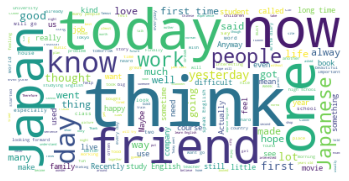

In [43]:
text = " ".join(final_data['correct'])

WC = WordCloud(background_color="white").generate(text)

plt.imshow(WC)
plt.axis("off")
plt.show()


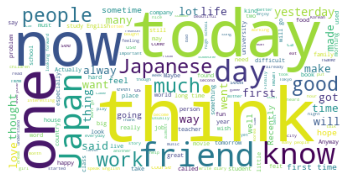

In [44]:
text = " ".join(final_data['error'])

WC = WordCloud(background_color="white").generate(text)

plt.imshow(WC)
plt.axis("off")
plt.show()

In [45]:
len_1 = [ len(final_data['correct'].iloc[i]) for i in range(len(final_data['correct'])) ]
len_2= [ len(final_data['error'].iloc[i]) for i in range(len(final_data['error'])) ]

Text(0.5, 0, 'Number of words in the grammatically correct sentences')

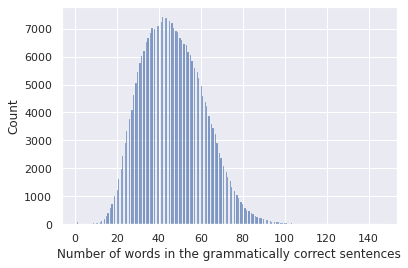

In [46]:
sns.set_theme()
ax = sns.histplot(data=len_1)
ax.set_xlabel('Number of words in the grammatically correct sentences')

Text(0.5, 0, 'Number of words in the grammatically incorrect sentences')

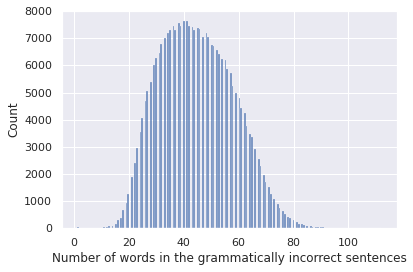

In [47]:
sns.set_theme()
ax = sns.histplot(data=len_2)
ax.set_xlabel('Number of words in the grammatically incorrect sentences')

In [48]:
for i in range(0, 100, 10):
  print(np.percentile(len_1,i))

1.0
28.0
33.0
38.0
42.0
46.0
50.0
54.0
59.0
66.0


In [49]:
for i in range(0, 100, 10):
  print(np.percentile(len_2,i))

1.0
28.0
32.0
36.0
40.0
44.0
48.0
52.0
57.0
63.0
